Analyse CO2 vs Temperature Anomaly from 800kyrs – present.
- Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)  
- Examine Irish context:  
- Climate change signals: (see Maynooth study: The emergence of a climate change signal in long-term Irish meteorological observations - ScienceDirect)   
- Fuse and analyse data from various data sources and format fused data set as a pandas dataframe and export to csv and json formats   
- For all of the above variables, analyse the data, the trends and the relationships between them (temporal leads/lags/frequency analysis).  
- Predict global temperature anomaly over next few decades (synthesise data) and compare to published climate models if atmospheric CO2 trends continue  
- Comment on accelerated warming based on very latest features (e.g. temperature/polar-ice coverage)  

In [2814]:
#importinng the necessaary libraries 
import numpy as np  
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sea

## CO2 dataset(s) - importing and sorting data
The data on atmospheric CO2 levels has been collected from the Epica Dome Concordia in Antarctica and from ice core   samples sourced from this location. Leading experts such as Dieter Luithi, and Jouzel have contributed significantly   to the creation of this dataset. This dataset has been used in the Intergovernmental Panel on Climate Change (IPCC) report on historical CO2 levels.  

The dataset presents data from approx. 800K years ago up to the year 2000. The age unit of the Gasage Age column is in years before present (yr BP) where the ‘present’ is 1950. Thus, to establish the calendar year for each entry, it is 1950 minus the Gasage Age figure for each entry.  
The CO2 data is measured in parts per million.
This CO2 dataset includes the revised data from Bereiter et al, 2015, which corrects the analytical bias discovered in the Luthi et al, 2008 version.  

>The IPCC excel document contains data form 800k years ago up to 2001.
>(Further additions to the dataset will be completed later to include data up to 2022).
>I have converted this excel file to a csv format so that it will be easier to use and all so all of the data will be in one uniform format.
> I will continue to convert all following excel files to csv files for ease of use.


In [2815]:
IPCC1 = pd.read_excel ("Rough Work CO2/IPCCreport1.xlsx", sheet_name='CO2 Composite') #setting the sheet I want to use data from
  
# I am converting the excel file to csv file for ease of use and manipulation
IPCC1.to_csv ("Rough Work CO2/IPCC.csv") 
    
# reading the csv file and converting it to dataframe object 
IPCC = pd.read_csv("Rough Work CO2/IPCC.csv", skiprows=15, header=None) # skipping first 15 rows as they do not contain actual data

IPCC = IPCC.iloc[:, 1:] # skipping first column as it just contains the row number; not actual data. The 1 specifies to skip column 0

IPCC.columns = ['Gasage (yr BP)', 'CO2 (ppmv)', 'sigma mean CO2 (ppmv)'] # setting titles of columns

IPCC.to_csv("Rough Work CO2/IPCC.csv", index=None) # saving the csv file with changes made


In [2816]:
IPCC['Year'] = 1950 - IPCC['Gasage (yr BP)'] # to get year in actual values as it was measured in years its been since 1950
IPCC = IPCC.sort_values('Year', ascending=True)
IPCC = IPCC.iloc[:, 1: ] # removing first column as have year now calculated
IPCC = IPCC.iloc[:, [0, 2]] # only want first and 3rd column 
IPCC.to_csv("Rough Work CO2/IPCCCO2Data_Year.csv", index=False) # adding year column 

### Mauna Loa CO2 data
As the CO2 data only goes as far as the year 2000, I have sourced more recent data on atmospheric CO2 levels. This   data is recorded at the Mauna Loa observatory, Hawaii.  

In [2817]:
MLC = pd.read_csv('Rough Work CO2/MaunaLoaCO2.txt', skiprows=88, header=None, delim_whitespace=True, engine='python') 
#true showing that the data in the text file is separated by whitespace; skipping 86 rows as only want data for 2000 onwards
MLC = MLC.iloc[:, :-1 ] 
MLC.columns = ['Year', 'Mean CO2']
MLC.to_csv (r'Rough Work CO2/MaunaLoaCO2.csv', index=None)

col = MLC.pop('Year')
MLC.insert(1, 'Year', col) #changing order of columns

MLC.to_csv('Rough Work CO2/UpdatedMaunaLoaCO2.csv', index=0)


In [2818]:
with open('Rough Work CO2/IPCCCO2Data_Year.csv', 'a', newline='') as f1: # opening the file for appending
    writer = csv.writer(f1)
    with open('Rough Work CO2/UpdatedMaunaLoaCO2.csv', 'r') as f2: # opening the file to write it to f1
        reader = csv.reader(f2)
        next(reader) # to skip column titles when appending
        for row in reader:
            writer.writerow(row)

combined_data = pd.read_csv('Rough Work CO2/IPCCCO2Data_Year.csv')
col = combined_data.pop('CO2 (ppmv)')
combined_data.insert(1, 'CO2 (ppmv)', col) #changing the column order

combined_data.to_csv('Rough Work CO2/CombinedIPCCCO2Data_Year.csv', index=0)

## Temperature dataset(s) - importing and sorting data

The data on historical temperature anomalies as been recorded at the Epica Dome Concordia in Antarctica and from ice core samples sourced from this location. Leading experts such as Dieter Luithi, and Jouzel have contributed significantly to the creation of this dataset. This dataset has been used in the Intergovernmental Panel on Climate Change (IPCC) report. 

The dataset presents data from approx. 800K years ago up to the year 1950. The temperature anomaly is the difference between the average temperature (over a specified 1000 year period) and the actual average temperature for that year.

In [2819]:
columns = ['Bag', 'ztop','Age','Deuterium', 'Temperature Anomoly'] #defining column titles as per Epica data source

data = pd.read_csv('Rough Work Temp/EpicaTemp.txt', skiprows=92, delim_whitespace=True, names=columns, engine='python') 
#true showing that the data in the text file is separated by whitespace

Epica = data[['Age', 'Temperature Anomoly']] # only want columns with Age and Temperature (other columns contain not extra data not necessary)

Epica.to_csv (r'Rough Work Temp/EpicaTemp.csv', index=None) #index=None so no index appears unecessarily


In [2820]:
Epica['Year'] = 1950 - Epica['Age'] # to get year in actual values as it was measured in years since 1950 (minusing age from 1950 to get actual year)
Epica = Epica.iloc[:, 1: ]
Epica.to_csv("Rough Work Temp/EpicaTempData_Year.csv", index=False)

C:\Users\rfeel\AppData\Local\Temp\ipykernel_29888\3403363579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Epica['Year'] = 1950 - Epica['Age'] # to get year in actual values as it was measured in years since 1950 (minusing age from 1950 to get actual year)


In [2821]:
#Mauna Loa temps  - not exactly from Mauna Loa but an approximate location in Hawaii
MLT = pd.read_csv('Rough Work Temp/HawaiiTemp.txt', delim_whitespace=True, engine='python') 
#true showing that the data in the text file is separated by whitespace
MLT.columns = ['Year', 'Average Annual Temperature (in degrees Celcius)']
MLT.to_csv (r'Rough Work Temp/HawaiiTemp.csv', index=None)


I have chosen not to add the above Mauna Loa Temperature data to the Jouzel Temperature data as this data includes general global temperatures. These temperatures will differ significantly from the temperatures recorded in one of the "coldest places on earth."  
Thus, using temperatures will show a sudden shift upwards in the most recent data and unduly alter the dataset, making it unsuitable for analysis. This would mean I have added incorrect data and influenced the data and trends.

In [2822]:
columns = ['Depth ice/snow [m]', 'Age model [ka]','δD [‰ SMOW]', 'delta T [°C]', 'Sample ID'] 

data = pd.read_csv('Rough Work Temp/JouzelTemperature.txt', skiprows=21, sep='\t', names=columns, engine='python') 
#true showing that the data in the text file is separated by whitespace

Jouzel = data[['Age model [ka]', 'delta T [°C]']] 
Jouzel.columns = ['Age', 'Temperature Anomaly [°C]']

Jouzel.to_csv (r'Rough Work Temp/JouzelTempData.csv', index=None)

In [2823]:
Jouzel['Year(for Temp)'] = 1950 - Jouzel['Age'] # to get year in actual values as it was measured in years since 1950
Jouzel = Jouzel.iloc[:, 1: ]
Jouzel = Jouzel.sort_values('Year(for Temp)')
Jouzel.to_csv("Rough Work Temp/JouzelTempData_Year.csv", index=False)

C:\Users\rfeel\AppData\Local\Temp\ipykernel_29888\2965914842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jouzel['Year(for Temp)'] = 1950 - Jouzel['Age'] # to get year in actual values as it was measured in years since 1950


In [2824]:
# newline is set to '' so that there is no space between the rows in the output csv
with open('Rough Work CO2/CombinedIPCCCO2Data_Year.csv', 'r') as t1, open('Rough Work Temp/JouzelTempData_Year.csv', 'r') as t2, open('Combination.csv', 'w', newline='') as output:
     r1 = csv.reader(t1, delimiter=',')  # delimiter is so the output is separated by commas
     r2 = csv.reader(t2, delimiter=',')
     w = csv.writer(output, delimiter=',')
     for a, b in zip(r1, r2):
             w.writerow(a + b)

# above is adapted from https://stackoverflow.com/questions/45133919/merging-two-csv-files-together-side-by-side

## Plotting the CO2 data over 800k years

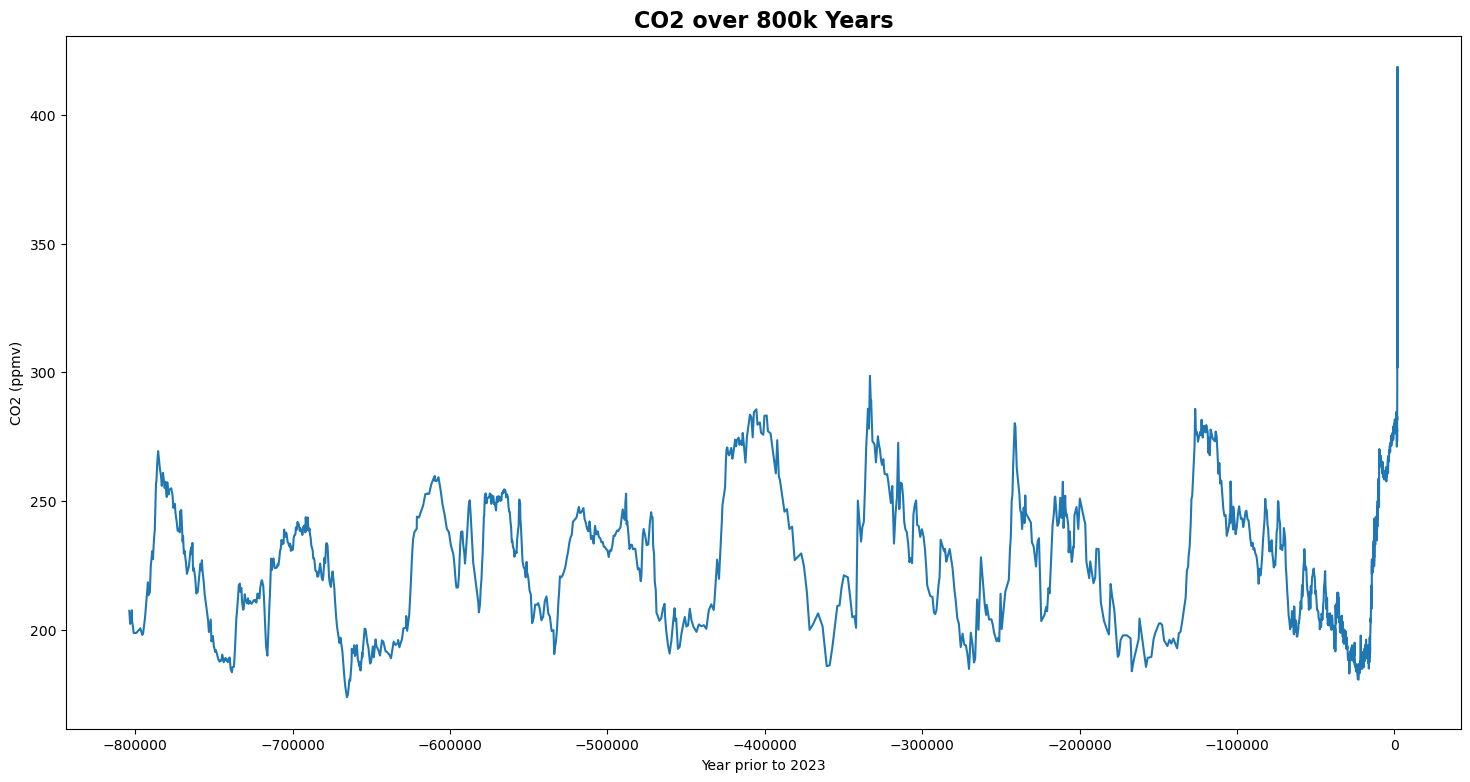

In [2825]:
CombinedData = pd.read_csv('Combination.csv')
fig, ax = plt.subplots(figsize=(18, 9))

ax.plot(CombinedData['Year'], CombinedData['CO2 (ppmv)'])
ax.set_xlabel('Year prior to 2023')
ax.set_ylabel('CO2 (ppmv)')

ax.set_title('CO2 over 800k Years', weight ='bold', size=16) #setting title, font size
plt.show()

The above graphs clearly displays that while CO2 levels have had peaks and troughs over the past 800k years, there has been a significant and unprecedented trend upwards in recent years. 

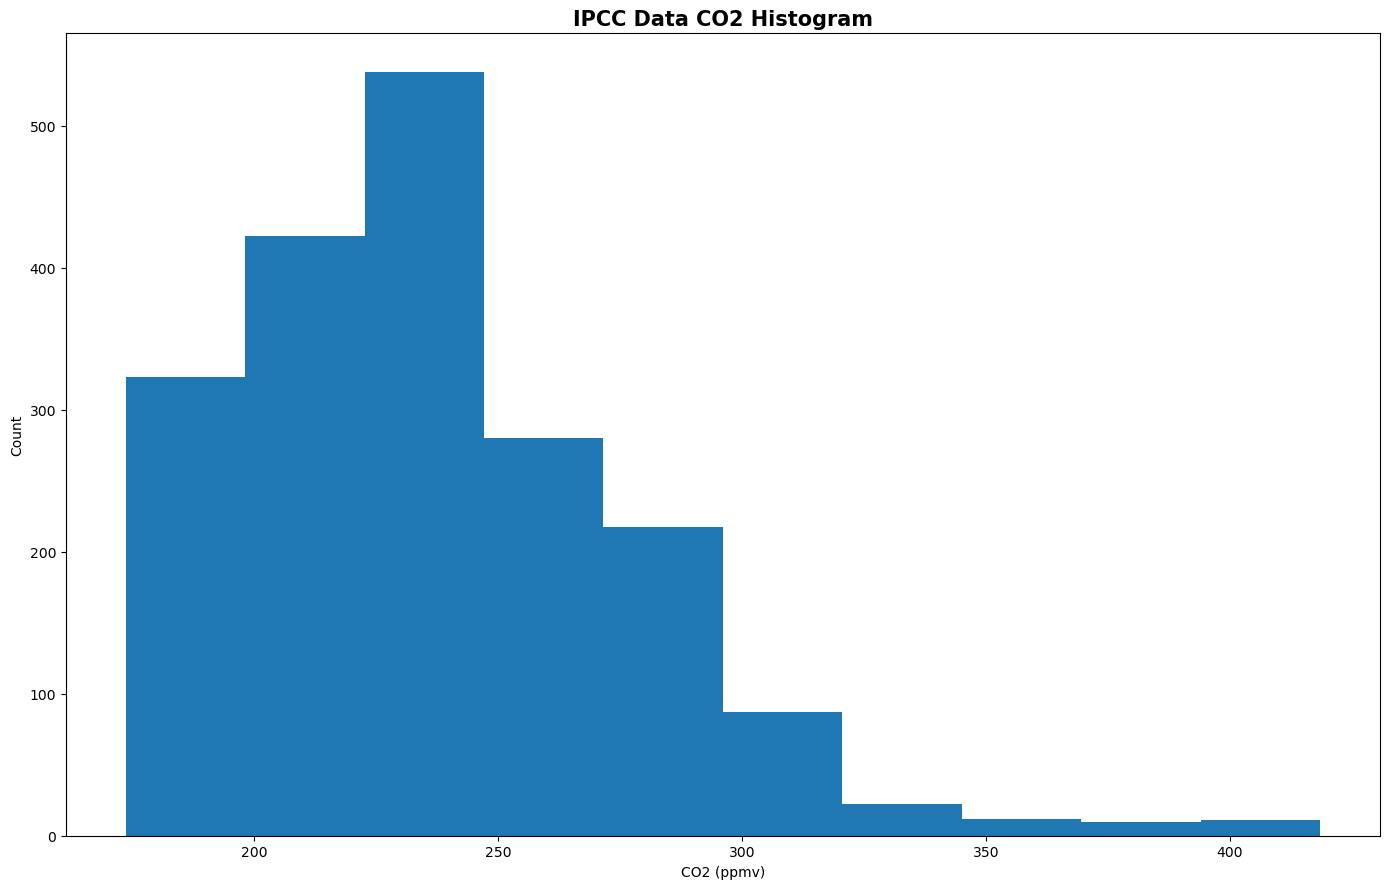

In [2826]:
# Histogram of CO2 
fig, ax = plt.subplots(figsize=(14,9))

ax.hist(CombinedData['CO2 (ppmv)'])
ax.set_xlabel('CO2 (ppmv)')
ax.set_ylabel('Count')
ax.set_title('IPCC Data CO2 Histogram', weight = 'bold', size = 15)
plt.tight_layout()
plt.show()

## Plotting the Temperature Anomoly over 800k years

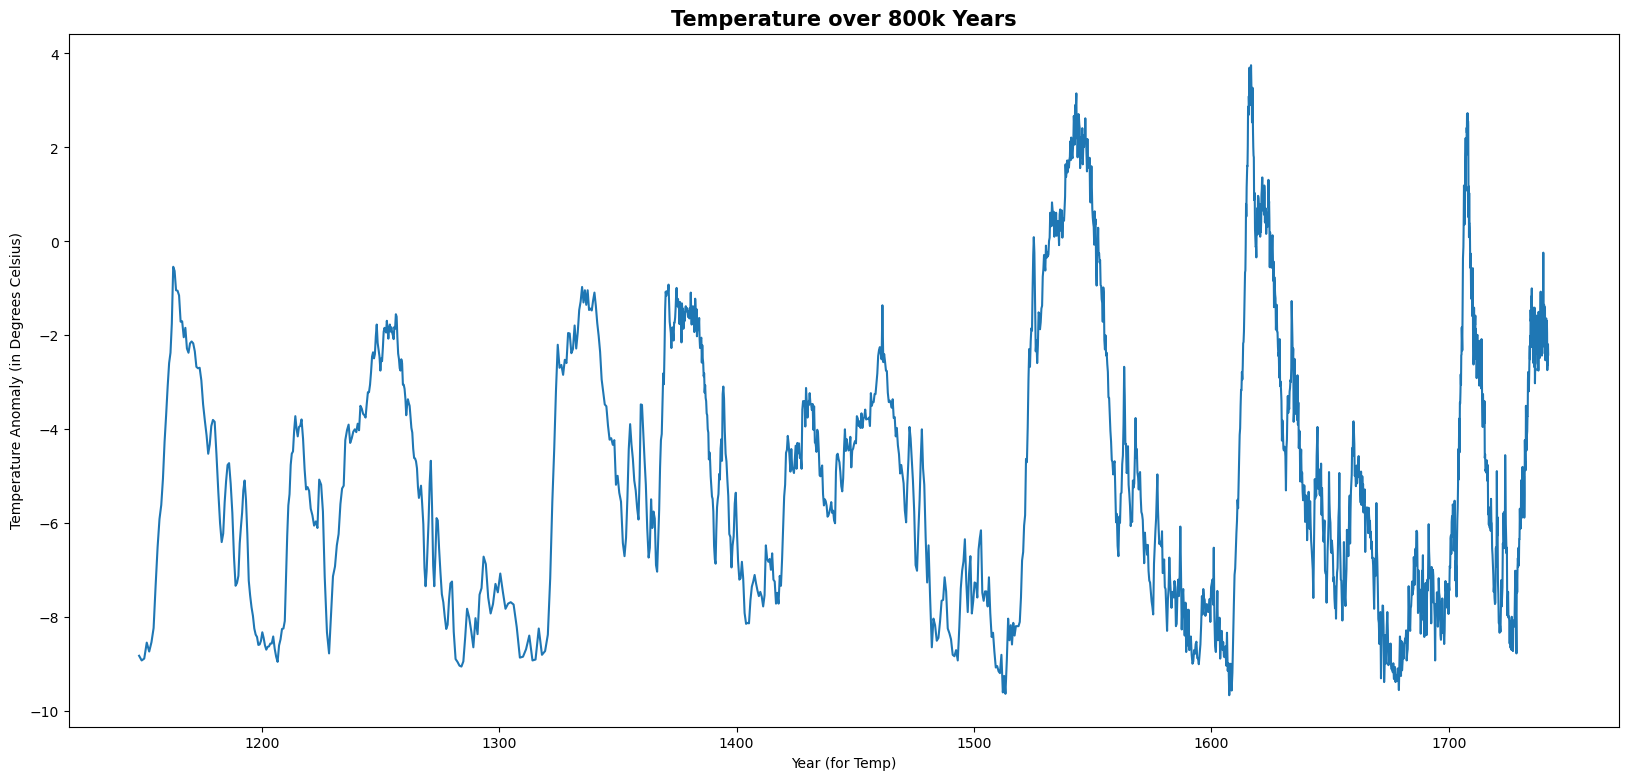

In [2827]:
CombinedData = pd.read_csv('Combination.csv')
fig, ax = plt.subplots(figsize=(20, 9))

ax.plot(CombinedData['Year(for Temp)'], CombinedData['Temperature Anomaly [°C]'])
ax.set_xlabel('Year (for Temp)')
ax.set_ylabel('Temperature Anomaly (in Degrees Celsius)')

ax.set_title('Temperature over 800k Years', weight ='bold', size=15)
plt.show()

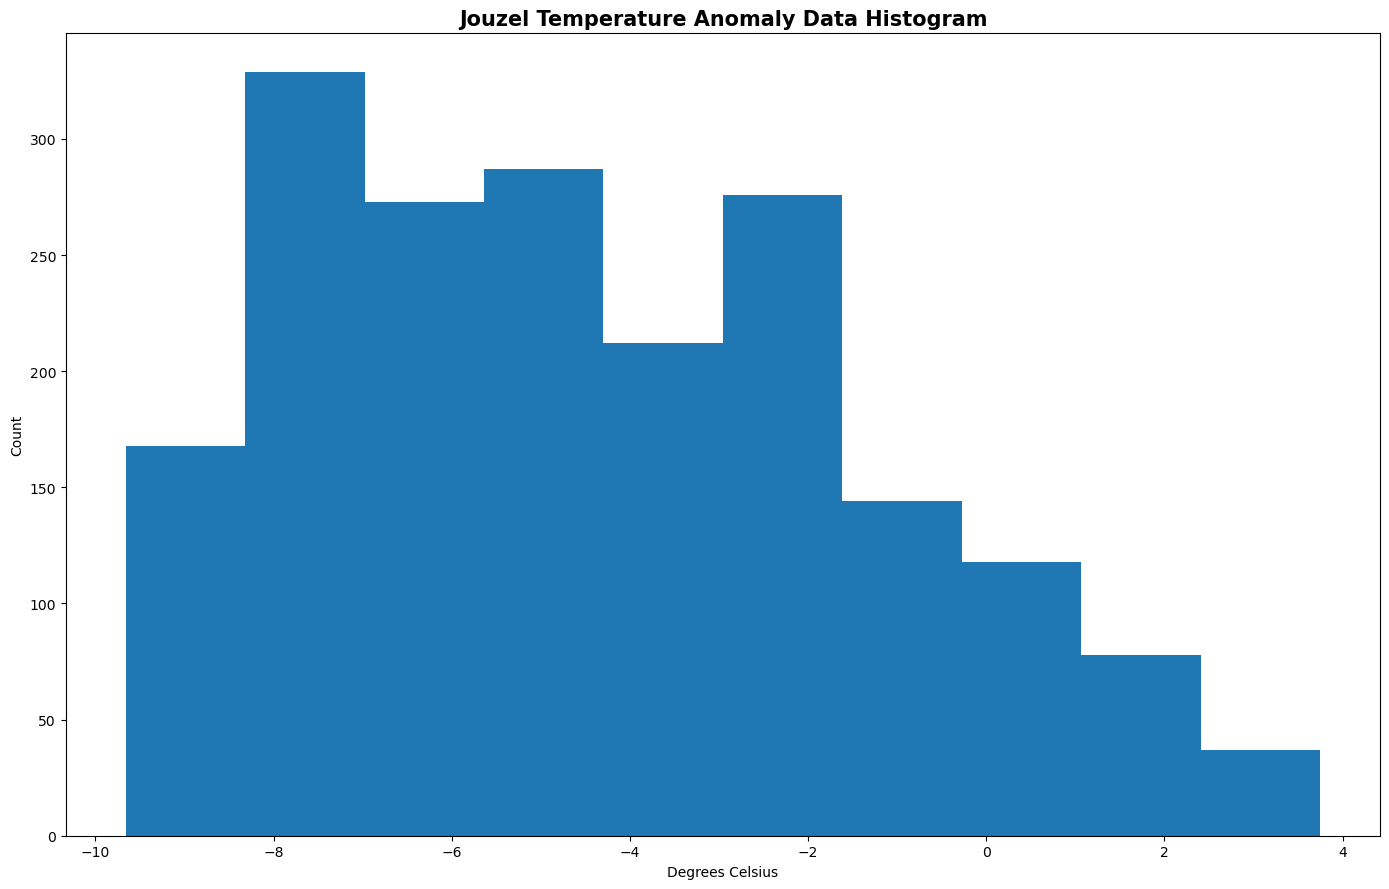

In [2828]:
fig, ax = plt.subplots(figsize=(14,9))

ax.hist(CombinedData['Temperature Anomaly [°C]'])
ax.set_xlabel('Degrees Celsius')
ax.set_ylabel('Count')
ax.set_title('Jouzel Temperature Anomaly Data Histogram', weight = 'bold', size = 15)
plt.tight_layout()
plt.show()

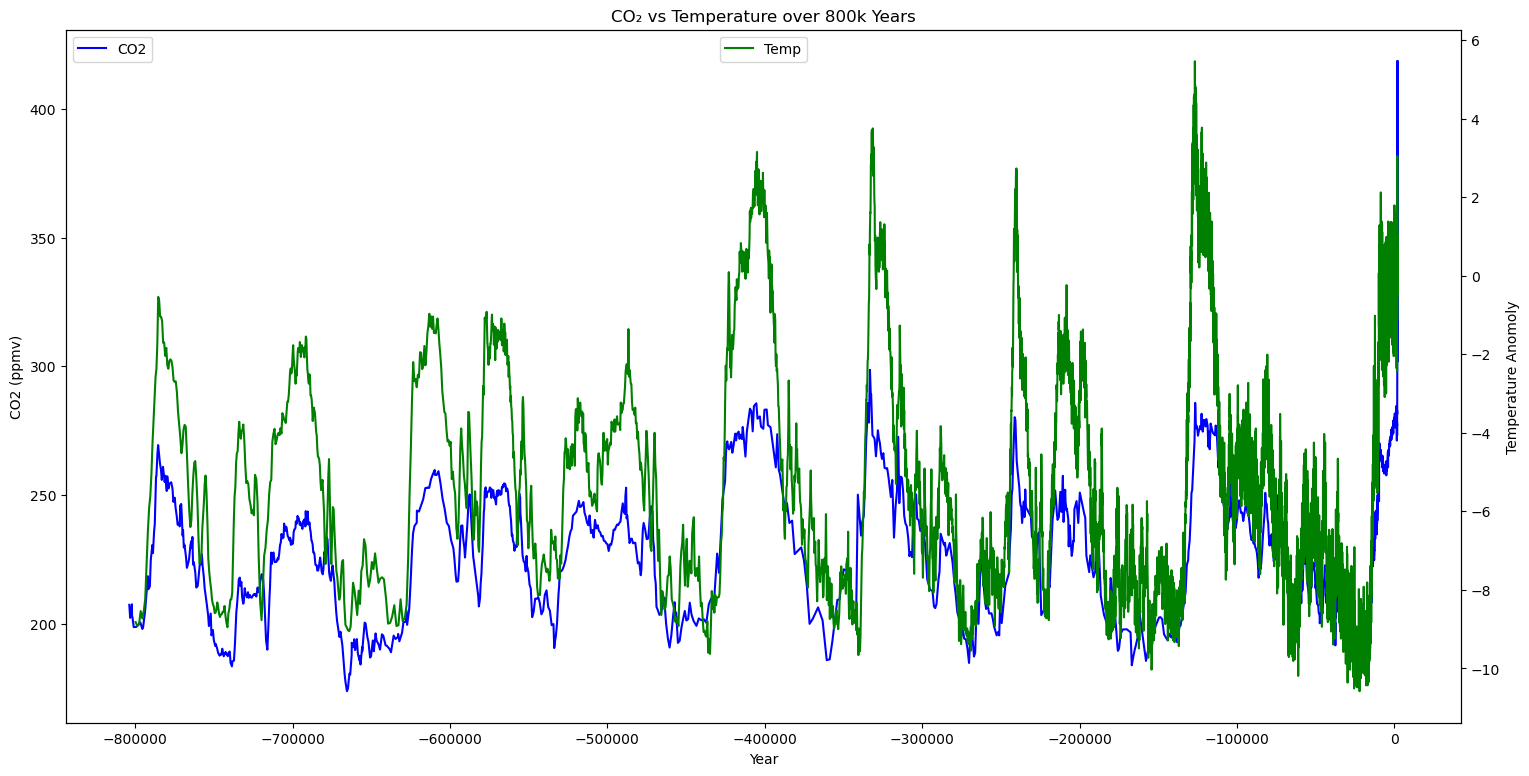

In [2829]:
Epica =pd.read_csv("Rough Work Temp/EpicaTempData_Year.csv") #using Epica temp data to compare with Epica CO2 data
fig, ax = plt.subplots(figsize=(18,9))
sea.lineplot(x="Year", y="CO2 (ppmv)", data=CombinedData, color="b", label="CO2")
ax2 = plt.twinx() #so both variables are on the same plot
sea.lineplot(x="Year", y="Temperature Anomoly", data=Epica, color="g", ax=ax2, label="Temp")
plt.title("CO₂ vs Temperature over 800k Years")
plt.legend(loc='upper center') #setting where legend will show on plot


Overall, based on the above data and graphs, the CO2 and temperature anomaly data appears to follow similar cyclical trends for the majority of the historic era over the past 800k years. Experts such as Jouzel have stated that this can be attributed to the events such as the major ice ages which occured, and the general cyclical nature of these variables.
However, as stated above, CO2 levels have been significantly on the rise, and it appears that the temperature anomaly rate is on the same rising trend.

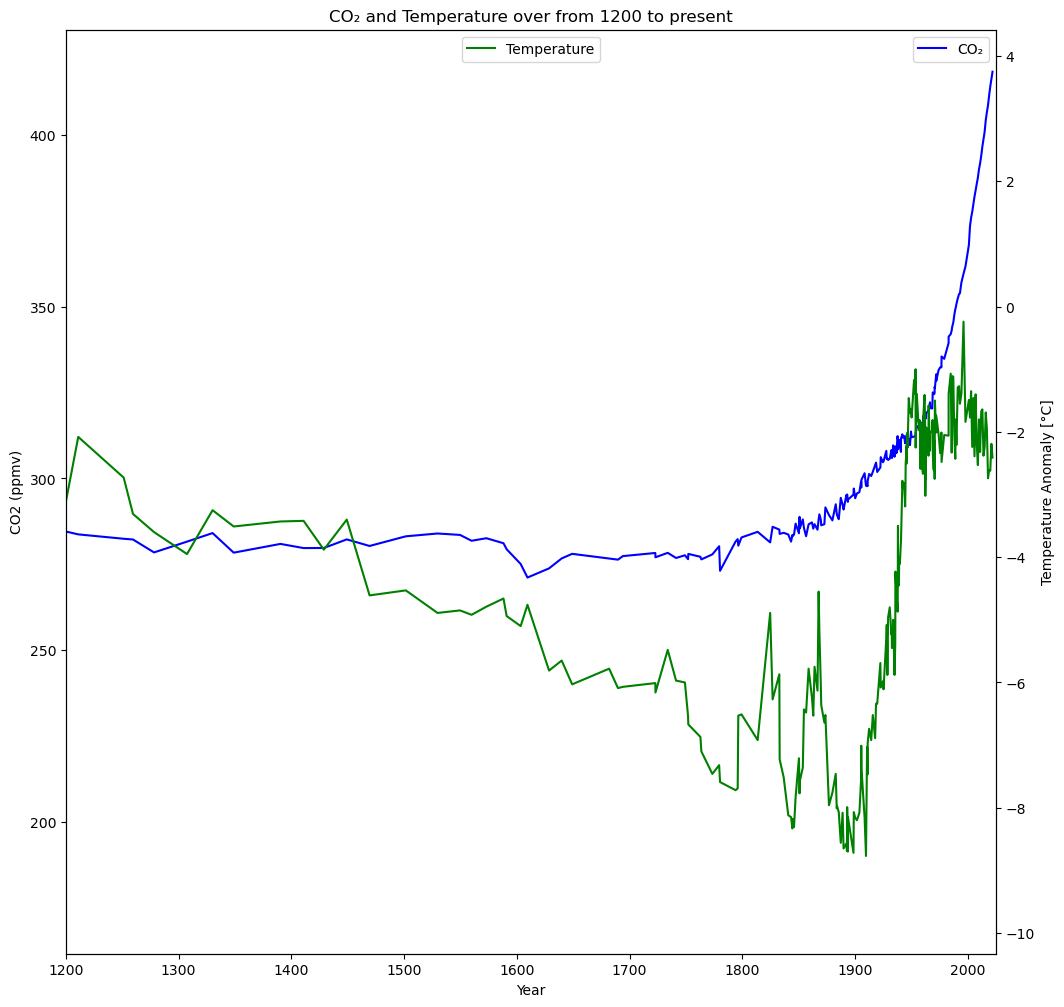

In [2830]:
fig, ax1 = plt.subplots(figsize=(12,12))
ax2 = ax1.twinx()
sea.lineplot(x="Year", y="CO2 (ppmv)", data=CombinedData, color="b", ax=ax1, label="CO₂")
sea.lineplot(x="Year", y="Temperature Anomaly [°C]", data=CombinedData, color="g", ax=ax2, label="Temperature")
ax1.set_xlim(1200, 2025)
ax2.set_xlim(1200, 2025)
plt.title("CO₂ and Temperature over from 1200 to present")
plt.legend(loc='upper center')

Looking at the above graph showing CO2 vs Temperature in more a more recent period from the year 1200 to present, it is evident that there has been a steep rise in CO2 levels beginning in approx 1800. This coincides with the occurance of the Industrial Revolution which began in 1760. 
The Industrial Revolution marked the beginning of a new era of widespread human activity contributing to CO2 levels, with the current high CO2 levels being unprecendented.

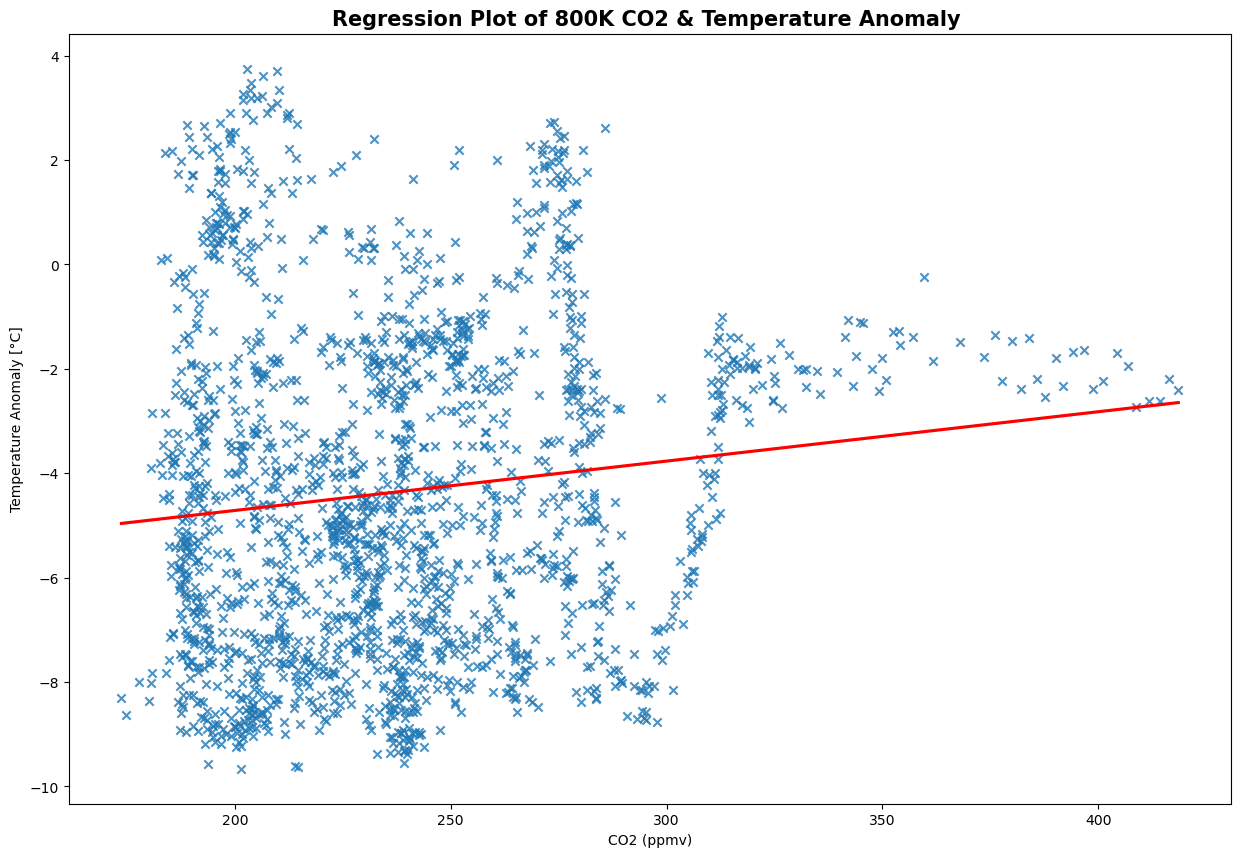

In [2831]:
fig, ax = plt.subplots(figsize=(15,10))

ax = sea.regplot(x='CO2 (ppmv)', y='Temperature Anomaly [°C]', data=CombinedData, marker="x", ci=None, line_kws=dict(color="r"))
ax.set_title('Regression Plot of 800K CO2 & Temperature Anomaly ', weight = 'bold', size = 15)

plt.show()

The above regression plot shows that there is an upward slope for the line of best fit, indicating that there is a positive relationship between the two variable types. Furthermore, while the x points may be spread out from the line, it does seem to follow the trend of the line so it indicates that the variables are positively related.

In [3023]:
# Lead & Lag Analysis
from scipy import signal
x = IPCC
y = Epica
correlation = signal.correlate(x-np.mean(x), y - np.mean(y), mode="full") #I am calculating the cross-correlation between means of x and y dataframes
lags = signal.correlation_lags(len(x), len(y), mode="full")
lag = lags[np.argmax(abs(correlation))]

print(lag)

-5799


c:\Users\rfeel\anaconda3\Lib\site-packages\scipy\signal\_signaltools.py:242: RuntimeWarning: Use of fft convolution on input with NAN or inf results in NAN or inf output. Consider using method='direct' instead.
  return convolve(in1, _reverse_and_conj(in2), mode, method)


Lead and Lag analysis essentially refers to cause and effect. It is utilised to move one variable either ahead or back in time in order to have the movement of the two variable types more closely matching each other if there is a time lag (i.e slower rate) between one variable and its effect on the other variable.

The above output of -5799 means that the maximum absolute correlation between the two datasets of temperature and CO2 occurs at a lag of -5799. Thus, the temperature data leads the CO2 data by 5799 units (in years before present(1950)). 
The above output thus leads me to the conclusion that the rise in CO2 levels lags behind the rise in temperature levels. Thus, it cannot be said that CO2 is to blame for the rise in temperatures considering the fact that the CO2 level rises seem to follow the temperature rises, not the other way around, as temperature leads the data. 
I would argue that while the CO2 lag has historic precedent, the higher the temperatures reach, the shorter the lag will befome.


## Methane dataset(s) - importing and sorting data

Methane is a very potent and powerful greenhouse gas, and such gases have long been pointed to as a cause for global warming. The more methane in the atmosphere, the more the greenhouse gases act as an insulator preventing the heat generated on earth from leaving the planet. Thus, it is important to consider methane as a factor when looking at CO2 and temperature trends over the past 800k years.

The data on Methane levels includes data from the EPICA Dome C in Antarctica, as per Loulerge et al, and ranges from approx. 800K years ago to 1937. It includes polar ice core samples which has been analysed through gas chromatography to determine the CH4 levels of each year. The age unit is presented as being in years before present (yr BP), where the ‘present’ for this calculation is the year 1950. Thus, to establish the calendar year for each entry, it is 1950 minus the Gas Age figure for each entry. 
The Methane (also known as CH4) data is measured in parts per billion and is the mean of the year.
I have combined the above data up to 1937, with 2 further datasets, including Methane levels measured at the Mauna Loa observatory in Hawaii, which covers the time period up to present day. 

(Please note that despite the fact this data is an amalgamation of methane levels from 3 separate datasets, this combined data does not display the same variance issues as arose with the combined temperature dataset. Thus, I believe this dataset is accurate and can be used for further analysis.)


In [3024]:
data = pd.read_csv('Rough Work Methane/Methanedatato1937.txt', skiprows=154, header=None, delim_whitespace=True, engine='python') 
#true showing that the data in the text file is separated by whitespace

data.columns = ['Depth', 'Gas Age', 'CH4 Mean', '1s', 'lab']

# Column 1: Depth; Col 2: Gas Age(EDC3 gas age, years before 1950 AD); Col3: CH4 mean (ppbv); Col4: Sigma uncertainty; Col5: Lab

data.to_csv (r'Rough Work Methane/Methanedatato1937.csv', index=None)


In [3025]:
Methane1937 = pd.read_csv('Rough Work Methane/Methanedatato1937.csv')

Methane1937['Year (for CH4)'] = 1950 - Methane1937['Gas Age'] # to get year in actual values as it was measured in years since 1950

Methane1937 = Methane1937.sort_values('Year (for CH4)', ascending=True)

Methane1937 = Methane1937.iloc[:, [2, 5]] # only want 3rd and 6th column (it is 0 indexed so starts counting at 0)

col = Methane1937.pop('Year (for CH4)')
Methane1937.insert(0, 'Year (for CH4)', col) # move year to first column
Methane1937.to_csv("Rough Work Methane/Methane_year.csv", index=False) 

In [3026]:
Methane1980 = pd.read_csv('Rough Work Methane/Methanedatato1980.txt', engine='python') 
#true showing that the data in the text file is separated by whitespace

Methane1980.to_csv (r'Rough Work Methane/Methanedatato1980.csv', index=None)


In [3027]:
with open('Rough Work Methane/Methane_year.csv', 'a', newline='') as f1: # opening the file for appending
    writer = csv.writer(f1)
    with open('Rough Work Methane/Methanedatato1980.csv', 'r') as f2: # opening the file to write it to f1
        reader = csv.reader(f2)
        next(reader) # to skip column titles when appending
        for row in reader:
            writer.writerow(row)

In [3028]:
upto2022Methane = pd.read_csv('Rough Work Methane/Methanedatato2022.txt', skiprows=45, engine='python', sep='\s+') 
#sep is used to show that txt file is separated by spaces instead of comma so csv recognises correct columns

upto2022Methane = upto2022Methane.iloc[:, :-1 ]
upto2022Methane.to_csv (r'Rough Work Methane/Methanedatato2022.csv', index=None)


In [3029]:

with open('Rough Work Methane/Methane_year.csv', 'a', newline='') as f1: # opening the file for appending
    writer = csv.writer(f1)
    with open('Rough Work Methane/Methanedatato2022.csv', 'r') as f2: # opening the file to write it to f1
        reader = csv.reader(f2)
        next(reader) # to skip column titles when appending
        for row in reader:
            writer.writerow(row)
# all the methane data is now included in one csv file called Methane_year.csv

### Methane Plotting

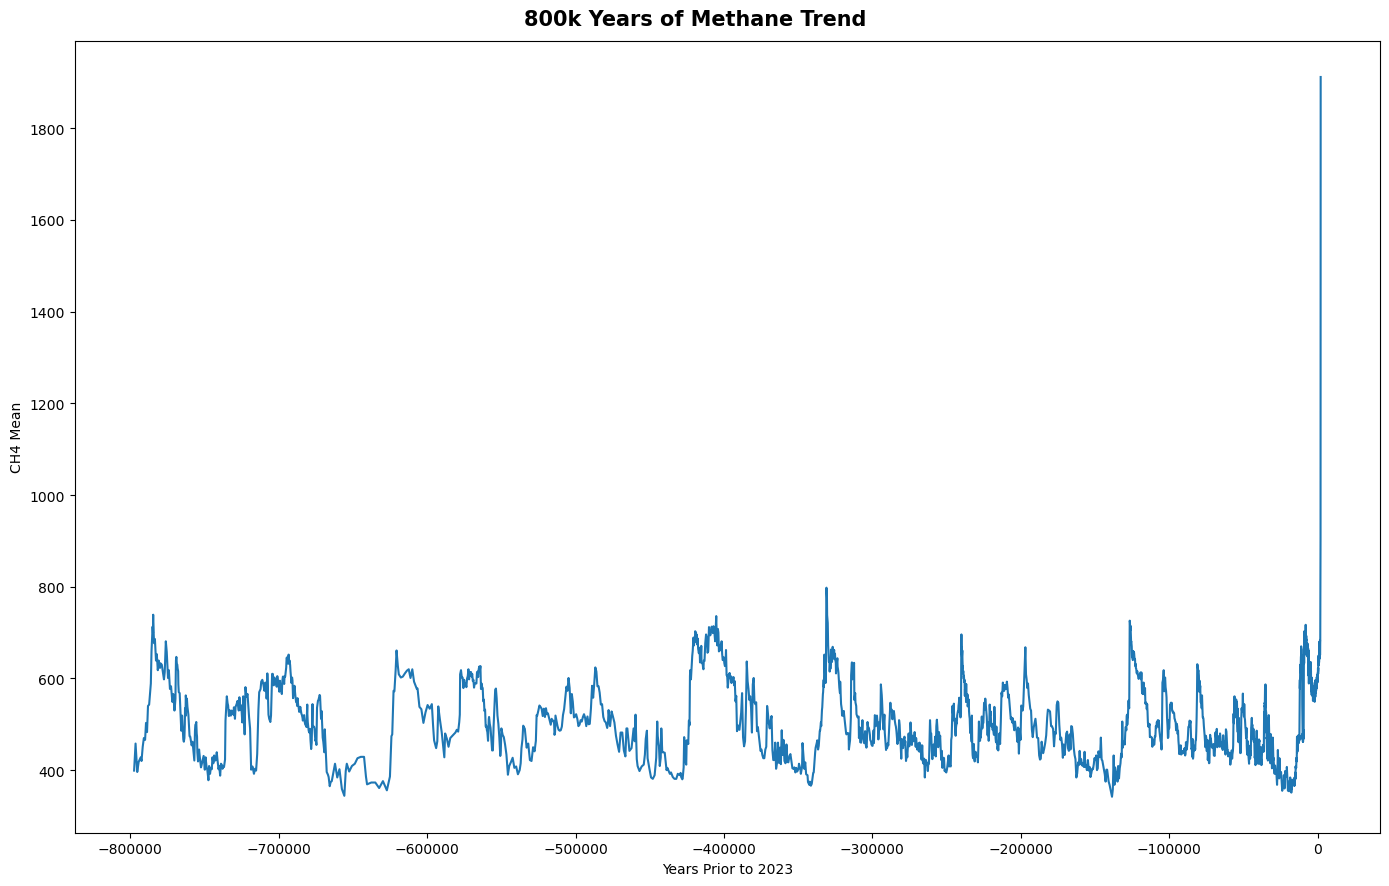

In [3030]:
CombinedMethane = pd.read_csv('Rough Work Methane/Methane_year.csv')
fig, ax = plt.subplots(figsize=(14, 9))

ax.plot(CombinedMethane['Year (for CH4)'], CombinedMethane['CH4 Mean'])

ax.set_xlabel('Years Prior to 2023')
ax.set_ylabel('CH4 Mean')
plt.suptitle('800k Years of Methane Trend', weight = 'bold', size = 15)
plt.tight_layout()
plt.show()

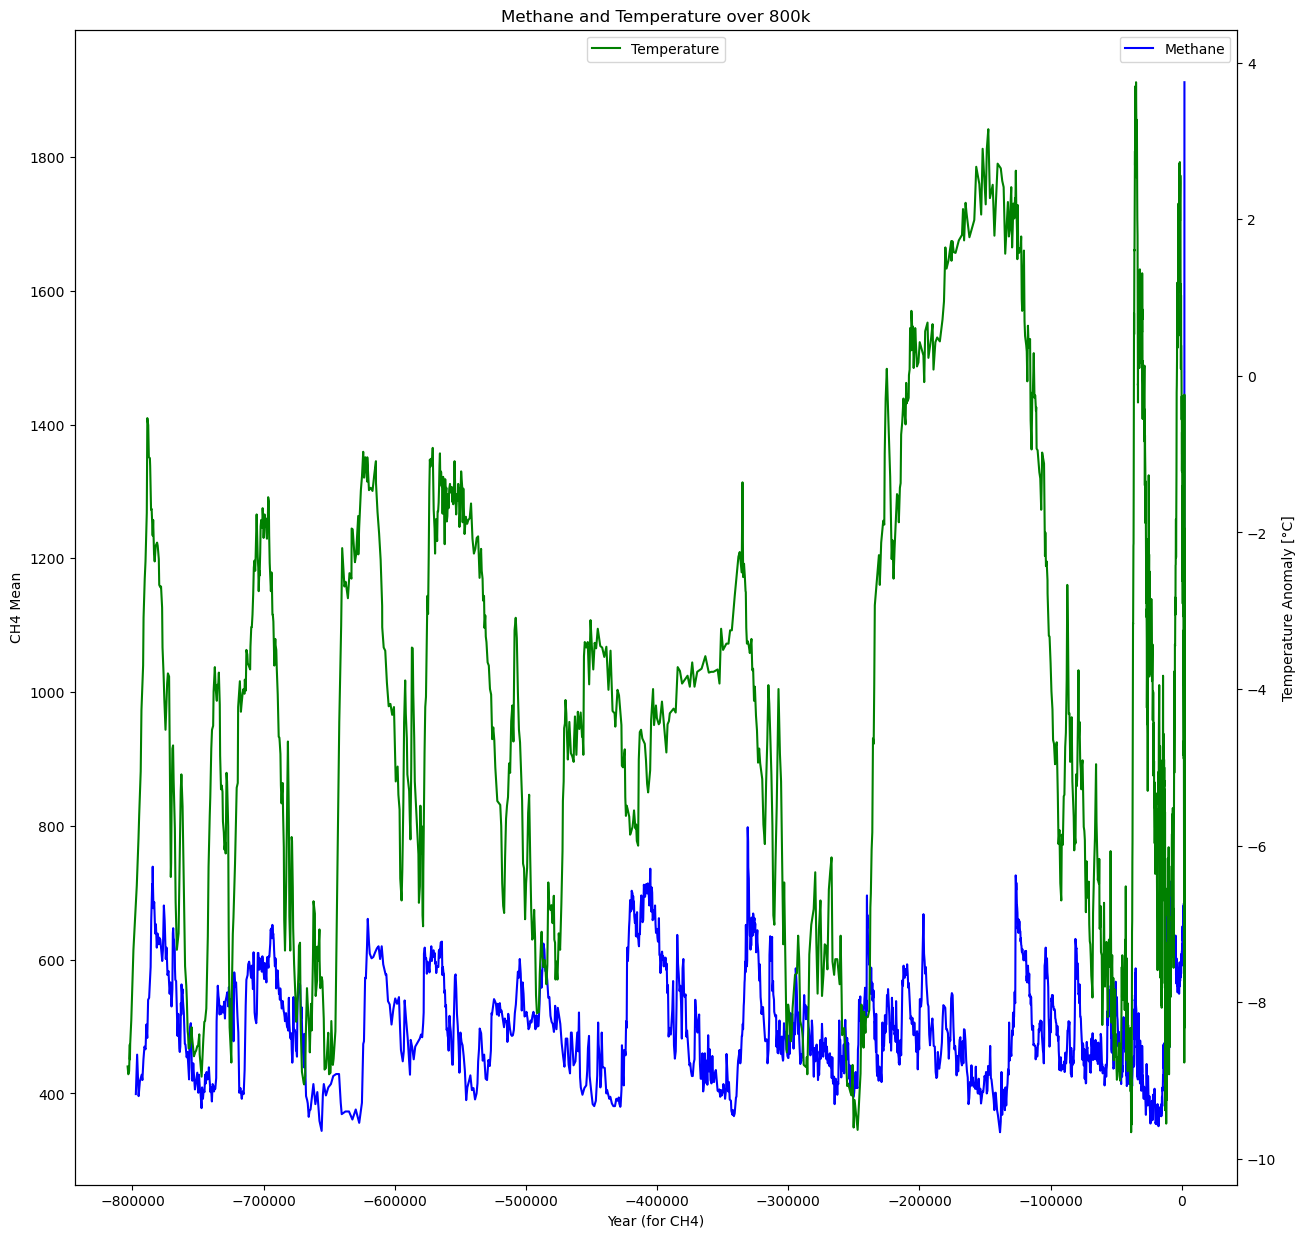

In [3031]:
fig, ax1 = plt.subplots(figsize=(15,15))
ax2 = ax1.twinx()
sea.lineplot(x="Year (for CH4)", y="CH4 Mean", data=CombinedMethane, color="b", ax=ax1, label="Methane")
sea.lineplot(x="Year", y="Temperature Anomaly [°C]", data=CombinedData, color="g", ax=ax2, label="Temperature")
plt.title("Methane and Temperature over 800k")
plt.legend(loc='upper center')

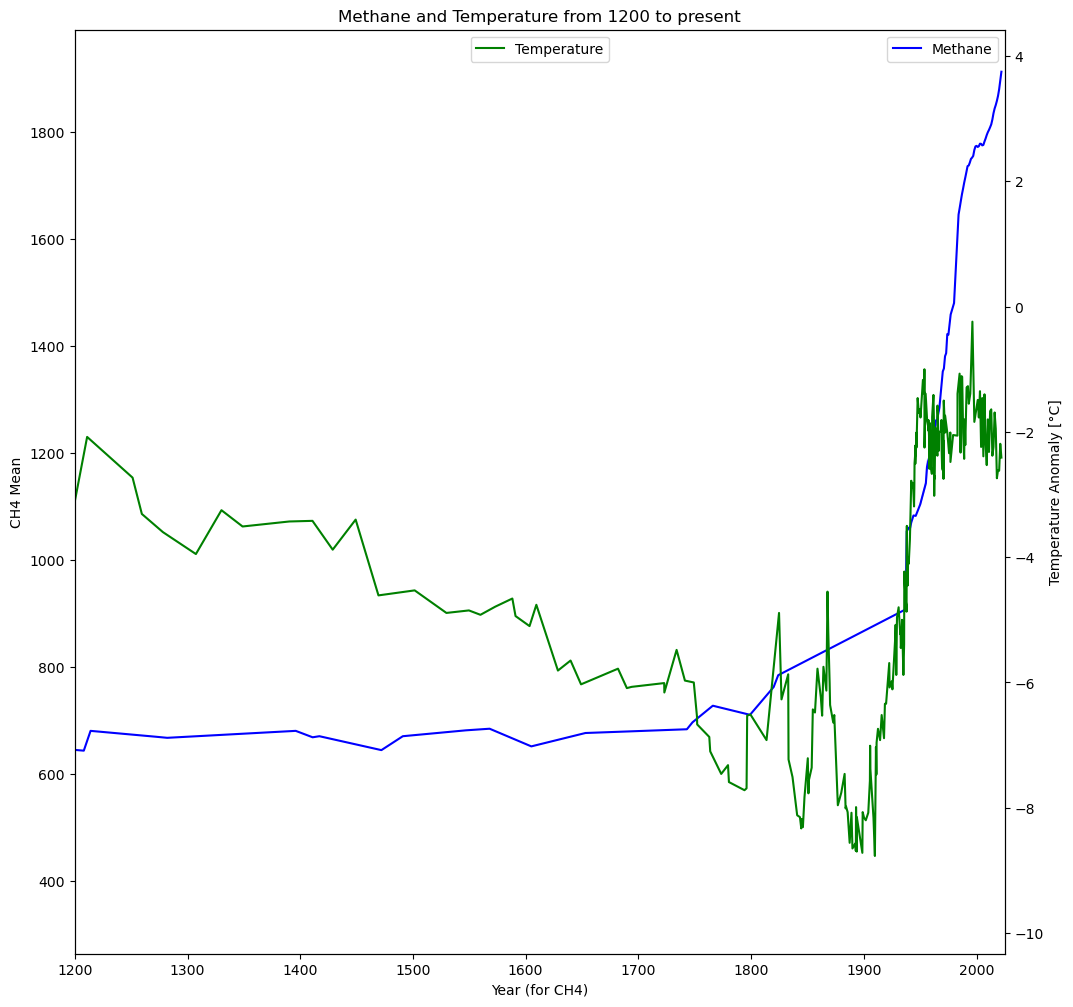

In [3032]:
fig, ax1 = plt.subplots(figsize=(12,12))
ax2 = ax1.twinx()
sea.lineplot(x="Year (for CH4)", y="CH4 Mean", data=CombinedMethane, color="b", ax=ax1, label="Methane")
sea.lineplot(x="Year", y="Temperature Anomaly [°C]", data=CombinedData, color="g", ax=ax2, label="Temperature")
ax1.set_xlim(1200, 2025)
ax2.set_xlim(1200, 2025)
plt.title("Methane and Temperature from 1200 to present")
plt.legend(loc='upper center')

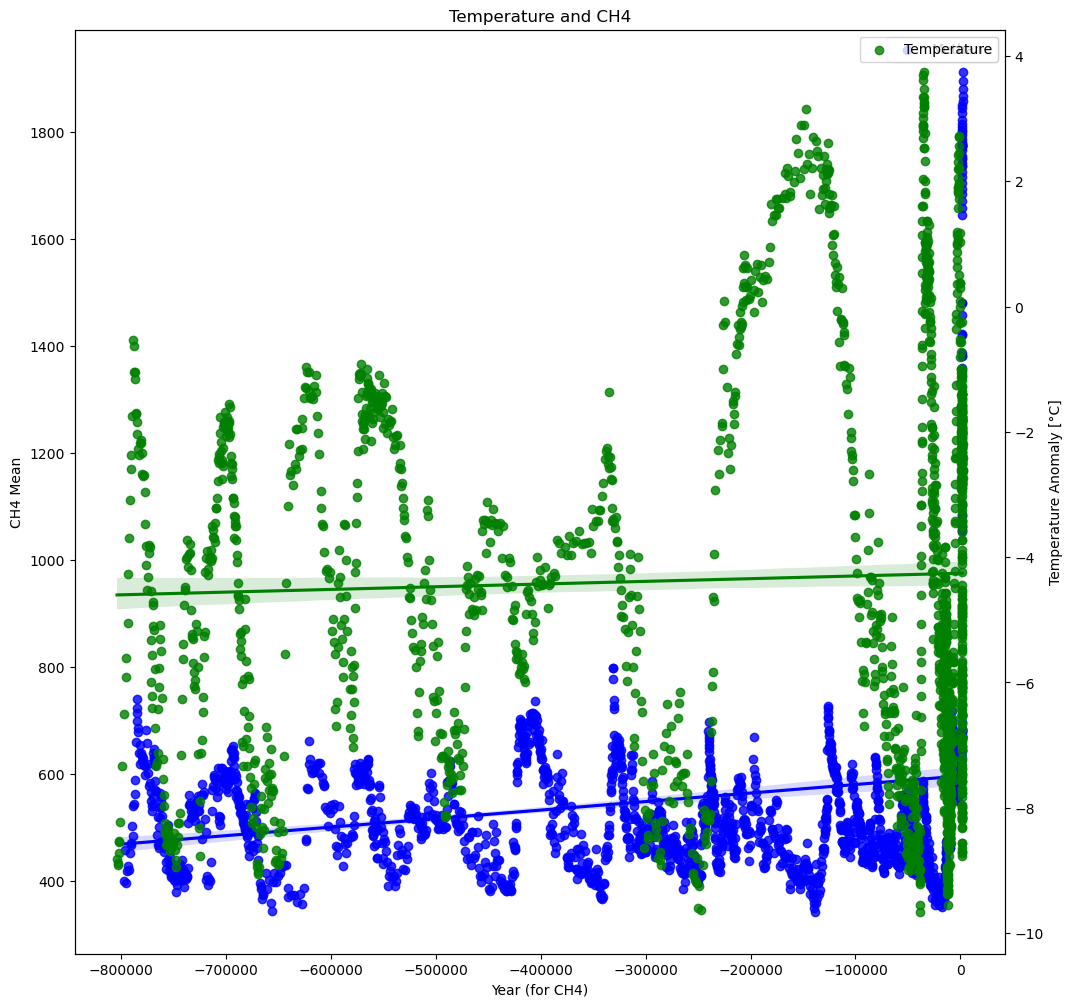

In [3033]:
# plotting a regression plot of Temperature and CH4
fig, ax1 = plt.subplots(figsize=(12,12))
ax2 = ax1.twinx()
sea.regplot(x="Year (for CH4)", y="CH4 Mean", data=CombinedMethane, color="b", ax=ax1, label="Methane")
sea.regplot(x="Year", y="Temperature Anomaly [°C]", data=CombinedData, color="g", ax=ax2, label="Temperature")
plt.title("Temperature and CH4")
ax1.legend()
ax2.legend()

The above regression plot shows that there is a slight upward slope for the line of best fit, indicating that there is a positive relationship between the temperature and CH4 levels, though this relationship may not be as strong as the below relationship demonstated between CO2 and CH4 levels. Furthermore, while the x points may be spread out from the line, it does seem to follow the trend of the line so it indicates that the variables are positively related.

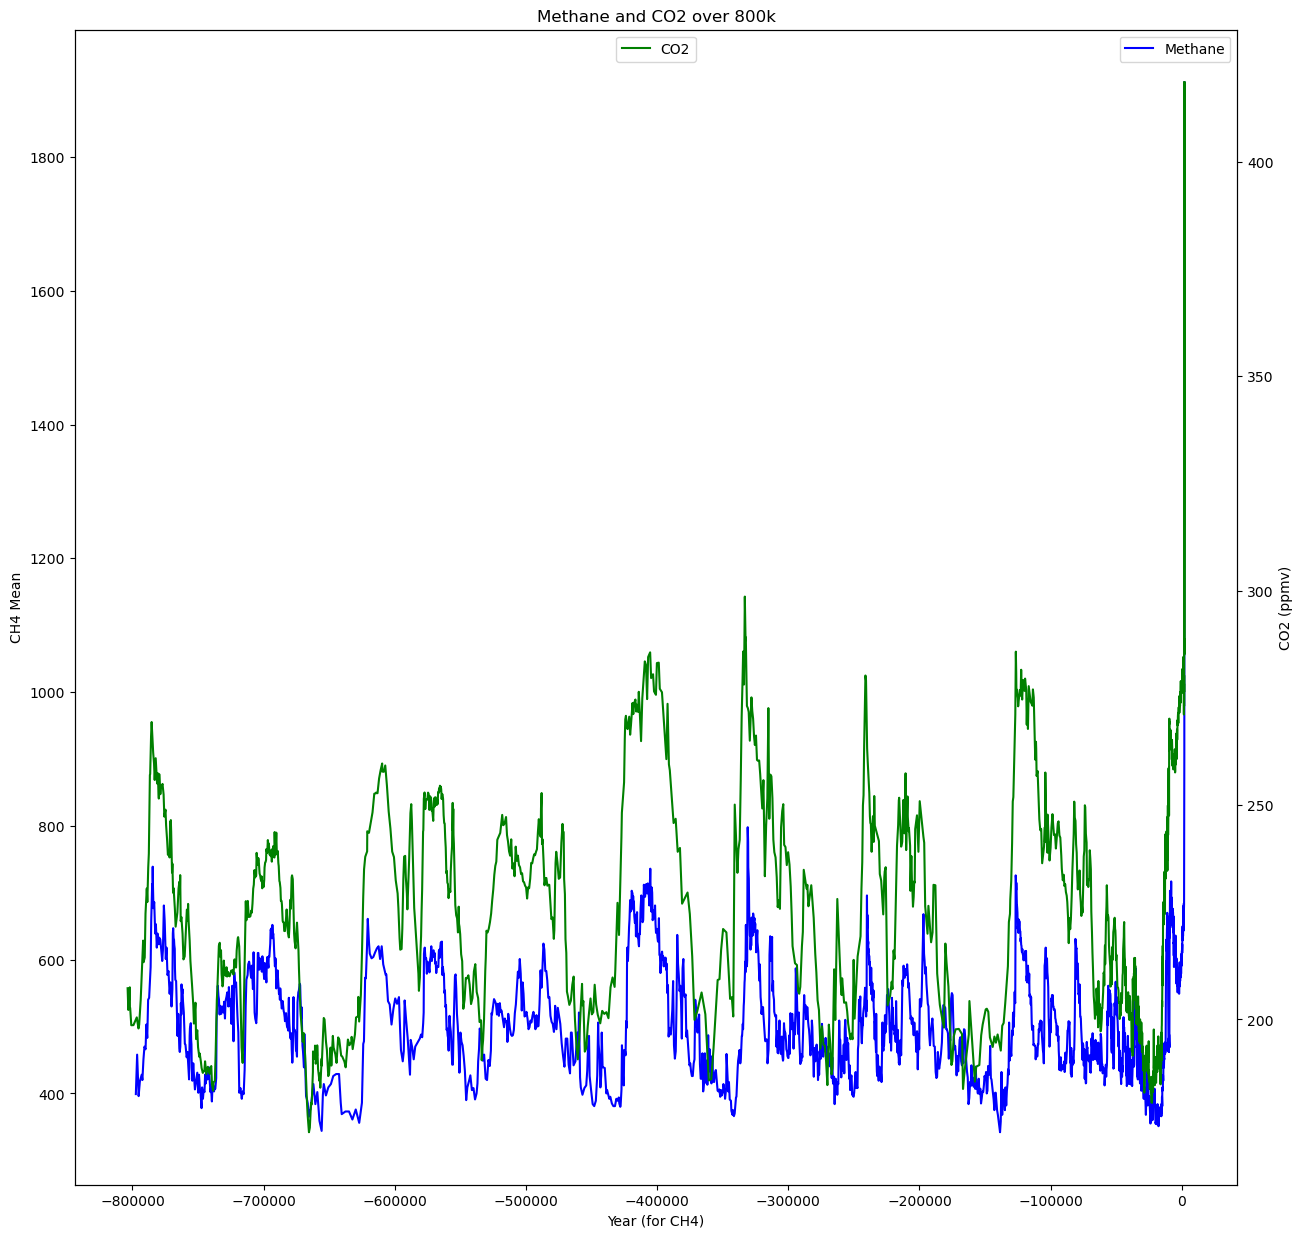

In [3104]:
fig, ax1 = plt.subplots(figsize=(15,15))
ax2 = ax1.twinx()
sea.lineplot(x="Year (for CH4)", y="CH4 Mean", data=CombinedMethane, color="b", ax=ax1, label="Methane")
sea.lineplot(x="Year", y="CO2 (ppmv)", data=CombinedData, color="g", ax=ax2, label="CO2")
plt.title("Methane and CO2 over 800k")
plt.legend(loc='upper center')

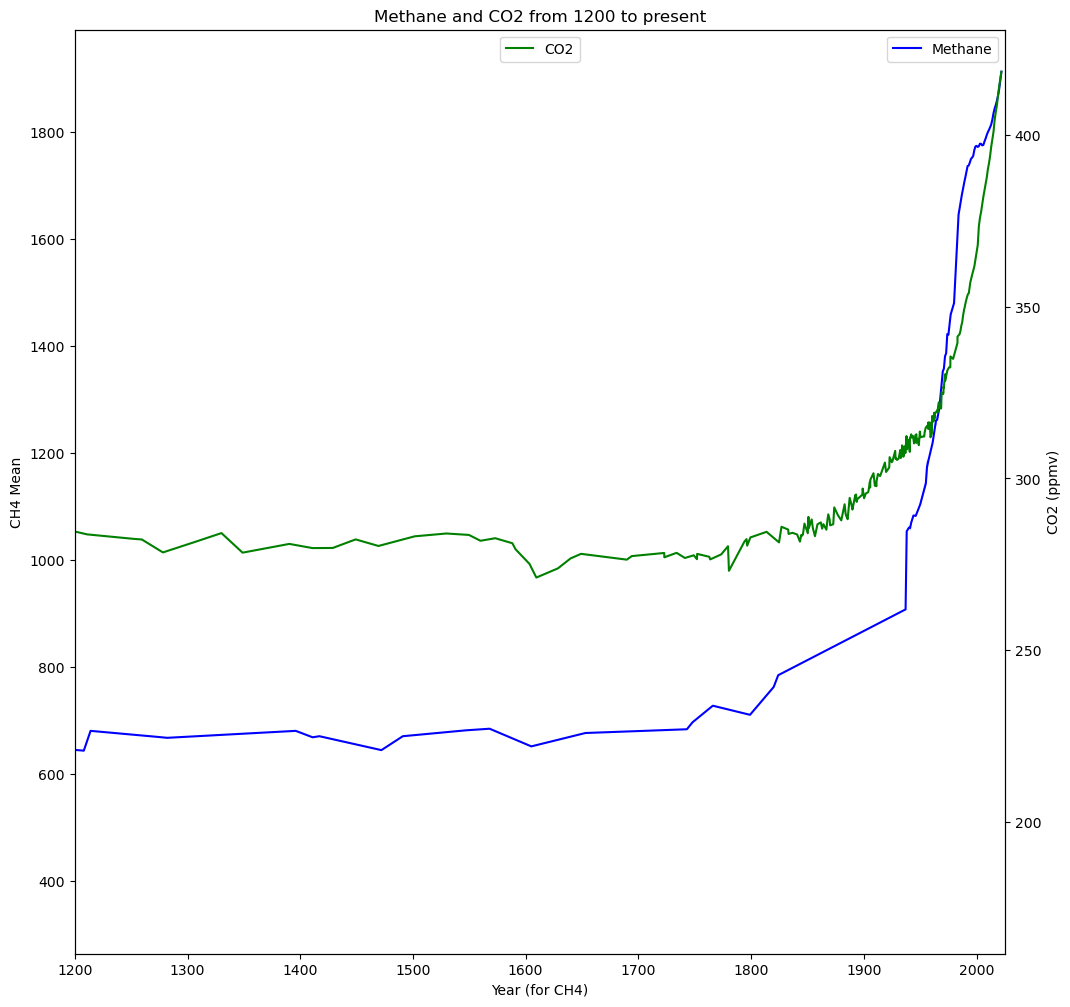

In [3105]:
fig, ax1 = plt.subplots(figsize=(12,12))
ax2 = ax1.twinx()
sea.lineplot(x="Year (for CH4)", y="CH4 Mean", data=CombinedMethane, color="b", ax=ax1, label="Methane")
sea.lineplot(x="Year", y="CO2 (ppmv)", data=CombinedData, color="g", ax=ax2, label="CO2")
ax1.set_xlim(1200, 2025)
ax2.set_xlim(1200, 2025)
plt.title("Methane and CO2 from 1200 to present")
plt.legend(loc='upper center')

Text(0.5, 1.0, 'Regression Plot of 800K CO2 & CH4 Mean ')

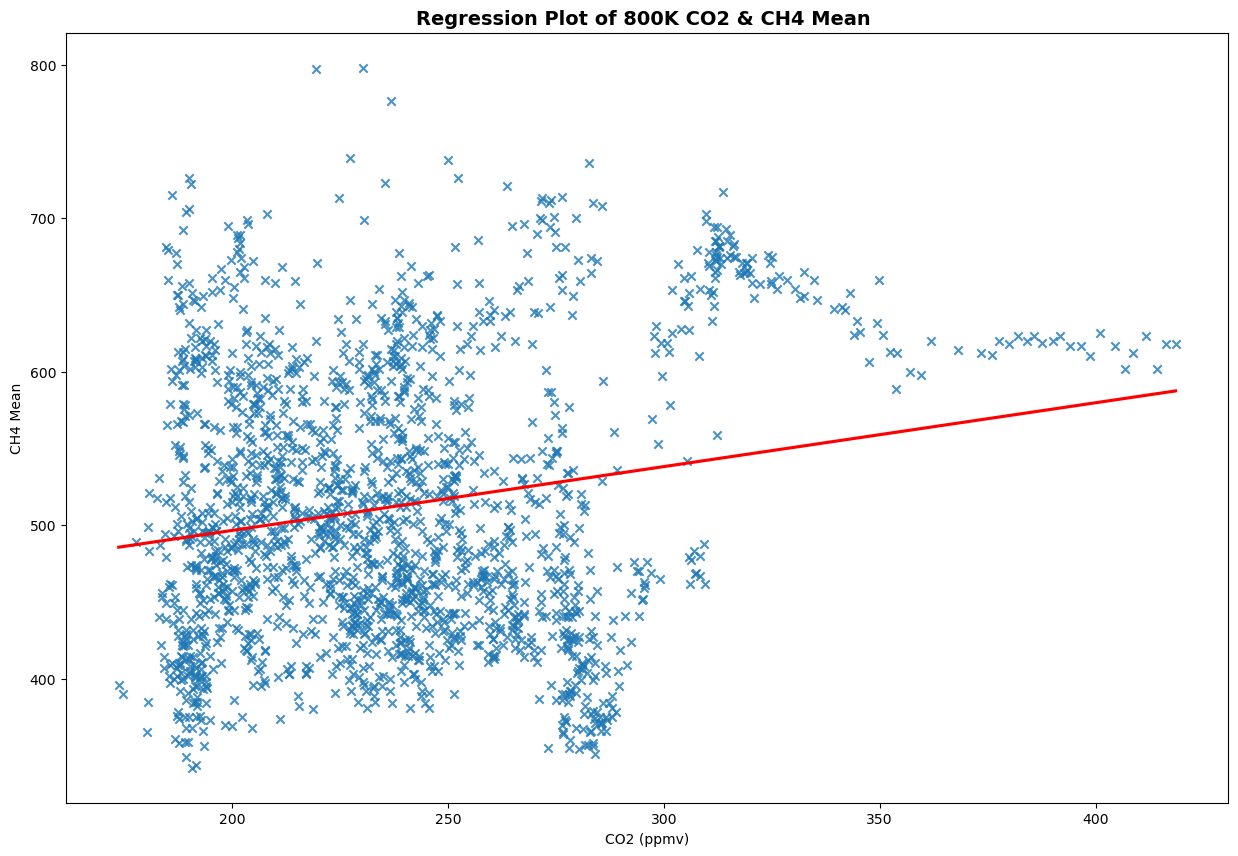

In [3107]:
fig, ax = plt.subplots(figsize=(15,10))

ax = sea.regplot(x='CO2 (ppmv)', y='CH4 Mean', data=CompletingData, marker="x", ci=None, line_kws=dict(color="r"))
ax.set_title('Regression Plot of 800K CO2 & CH4 Mean ', weight = 'bold', size = 14)

The above regression plot shows that there is an more steep upward slope for the line of best fit, indicating that there is a positive relationship between the CO2 levels and CH4. Furthermore, while the x points may be spread out from the line, it does seem to follow the trend of the line so it indicates that the variables are positively related.

## Examing the Irish Context - importing and sorting data

I will now examine the Irish context, as per the project requirements. However, the data for Irish Temperatures & Rainfall has not been recorded back to the eras of the above CO2 and Methane. This will be an examination of more recent times and a look towards the future anticipated trends.

The data on annual mean temperatures in Ireland and annual mean precipitation levels in Ireland goes back as far as the year 1901 to present, and includes data from Met Eireann.



### Ireland Annual Mean Temperature

In [ ]:
IrishData = pd.read_excel("Irish Rough Work/dataDublinAirport.xlsx") 
  
IrishData.to_csv("Irish Rough Work/dataDublinAirport.csv", index=None) 

IrishData = pd.read_csv("Irish Rough Work/dataDublinAirport.csv", skiprows=19) # skipping first 15 rows as they do not contain actual data
IrishData = IrishData.iloc[:, [0, 1, 2, 7]] # only want first and 3rd column 

IrishData.to_csv("Irish Rough Work/temp&rainDublinAirport.csv", index=None) # saving the csv file back to the dataframe with the adjustments made


In [ ]:
TempDatafrom1901 = pd.read_excel("Irish Rough Work/Annualtempfrom1901.xlsx") 
  
# Writing the excel file into csv file 
TempDatafrom1901.to_csv("Irish Rough Work/Annualtempfrom1901.csv", index=None) 
TempDatafrom1901 = pd.read_csv('Irish Rough Work/Annualtempfrom1901.csv')

# average temperature from 1940-1955 is 9.43 degrees celcius
# I will use this to take this degrees from the temperature mean each year to get the temperature anomaly

TempDatafrom1901['Anomoly'] = TempDatafrom1901['Annual Mean Temperature '] - 9.43
TempDatafrom1901['Anomoly'] = TempDatafrom1901['Anomoly']

TempDatafrom1901.to_csv('Irish Rough Work/CompleteIrishTemperatures1900-2022.csv', index=None)


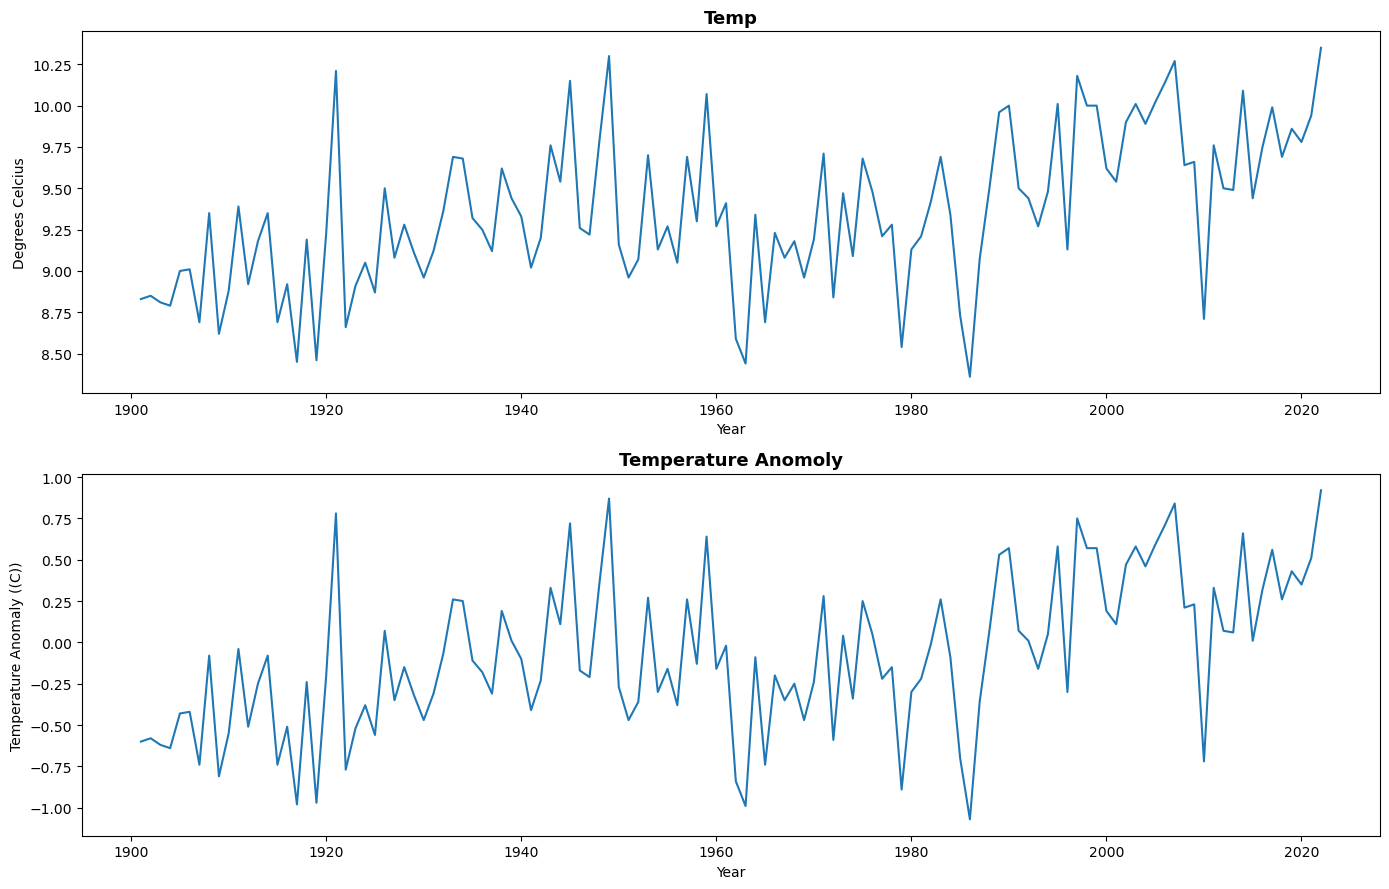

In [ ]:
CompleteIrishTemperaturesfrom1900 = pd.read_csv('Irish Rough Work/CompleteIrishTemperatures1900-2022.csv')
fig, axs = plt.subplots(2, figsize=(14, 9))

axs[0].plot(CompleteIrishTemperaturesfrom1900['Year'], CompleteIrishTemperaturesfrom1900['Annual Mean Temperature '], label = 'Mean Temperature')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Degrees Celcius')
axs[0].set_title('Temp', weight ='bold', size=13)

axs[1].plot(CompleteIrishTemperaturesfrom1900['Year'], CompleteIrishTemperaturesfrom1900['Anomoly'])
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Temperature Anomaly ((C))')
axs[1].set_title('Temperature Anomoly', weight ='bold', size=13)

plt.tight_layout()
plt.show()

### Ireland Annual Mean Precipitation

In [ ]:
RainDatafrom1901 = pd.read_excel("Irish Rough Work/annualrain1901-2022.xlsx") 
RainDatafrom1901.to_csv("Irish Rough Work/Annualrainfrom1901.csv", index=None) 

RainDatafrom1901 = pd.read_csv('Irish Rough Work/Annualrainfrom1901.csv')

# average rainfall from 1940-1955 is 1128.79
# I will use this to take this from the rain mean each year to get the rainfall anomaly

RainDatafrom1901['Anomoly'] = RainDatafrom1901['Annual Mean Precipitation '] - 1128.79

RainDatafrom1901['Anomoly'] = RainDatafrom1901['Anomoly']

RainDatafrom1901.to_csv ('Irish Rough Work/CompleteIrishRainfall1900-2022.csv', index=None)

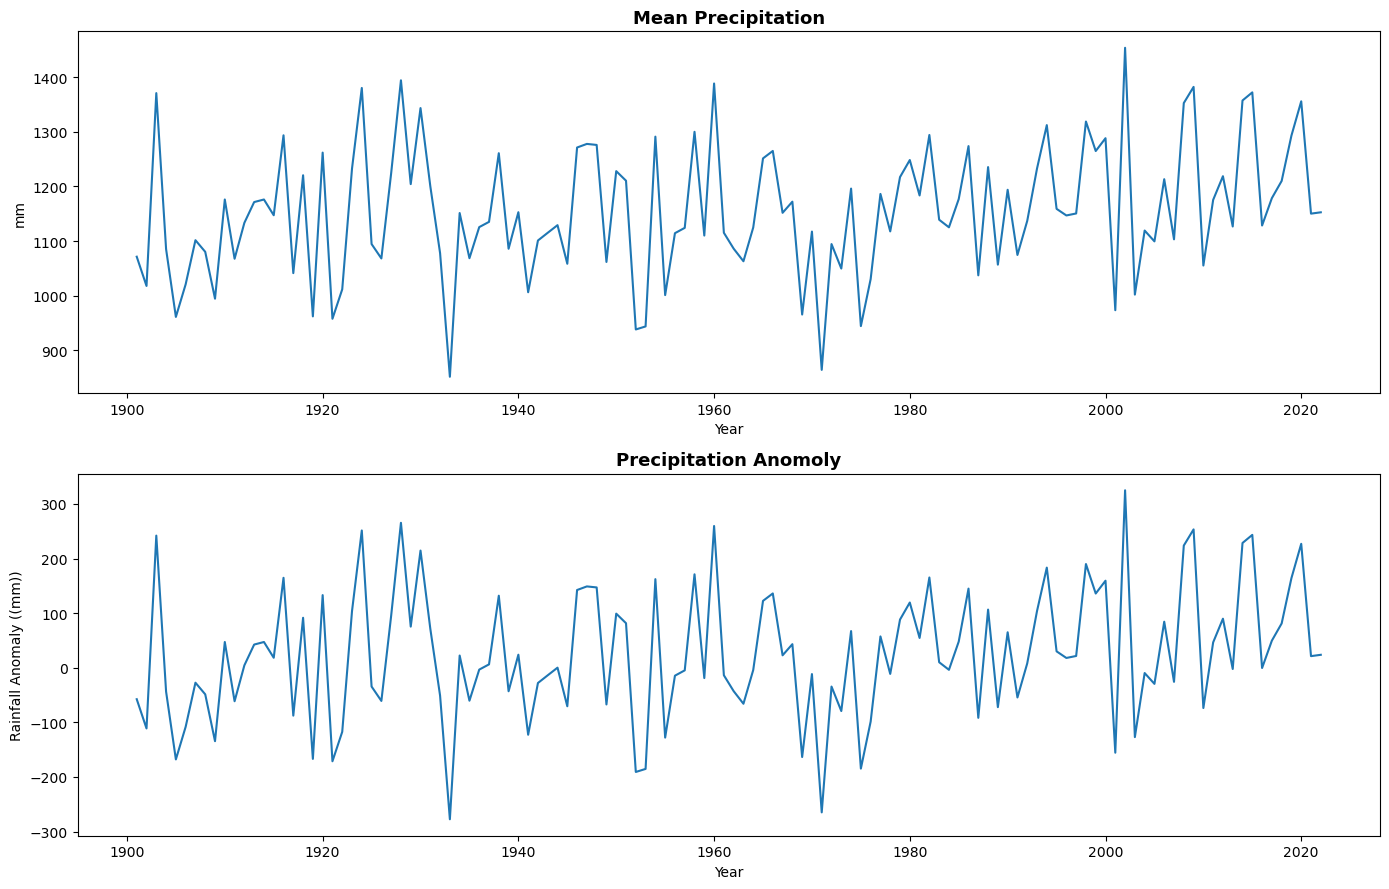

In [ ]:
CompleteRainDatafrom1901 = pd.read_csv('Irish Rough Work/CompleteIrishRainfall1900-2022.csv')
fig, axs = plt.subplots(2, figsize=(14, 9))

axs[0].plot(CompleteRainDatafrom1901['Year'], CompleteRainDatafrom1901['Annual Mean Precipitation '], label = 'Mean Precipitation')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('mm')
axs[0].set_title('Mean Precipitation', weight ='bold', size=13)

axs[1].plot(CompleteRainDatafrom1901['Year'], CompleteRainDatafrom1901['Anomoly'])
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Rainfall Anomaly ((mm))')
axs[1].set_title('Precipitation Anomoly', weight ='bold', size=13)

plt.tight_layout()
plt.show()

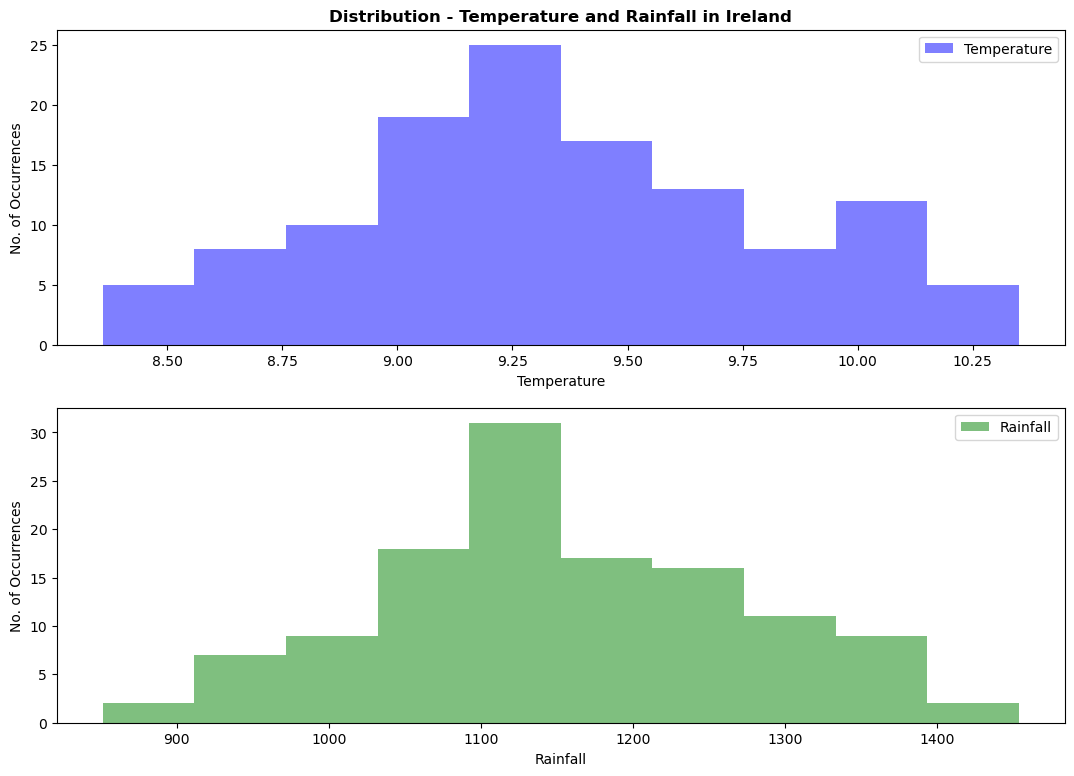

In [ ]:
fig, axes = plt.subplots(2, figsize = (13,9))  # to create two vertically stacked subplots

axes[0].set_title("Distribution - Temperature and Rainfall in Ireland", fontweight='bold')
axes[0].set(xlabel='Temperature')
axes[0].set(ylabel="No. of Occurrences")
axes[0].hist(CompleteIrishTemperaturesfrom1900['Annual Mean Temperature '], bins=10, alpha=0.5, label="Temperature", color='blue')
axes[0].legend(loc='upper right')

axes[1].set(xlabel='Rainfall')
axes[1].set(ylabel="No. of Occurrences")
axes[1].hist(CompleteRainDatafrom1901['Annual Mean Precipitation '], bins=10, alpha=0.5, label="Rainfall", color='green')
axes[1].legend(loc='upper right')

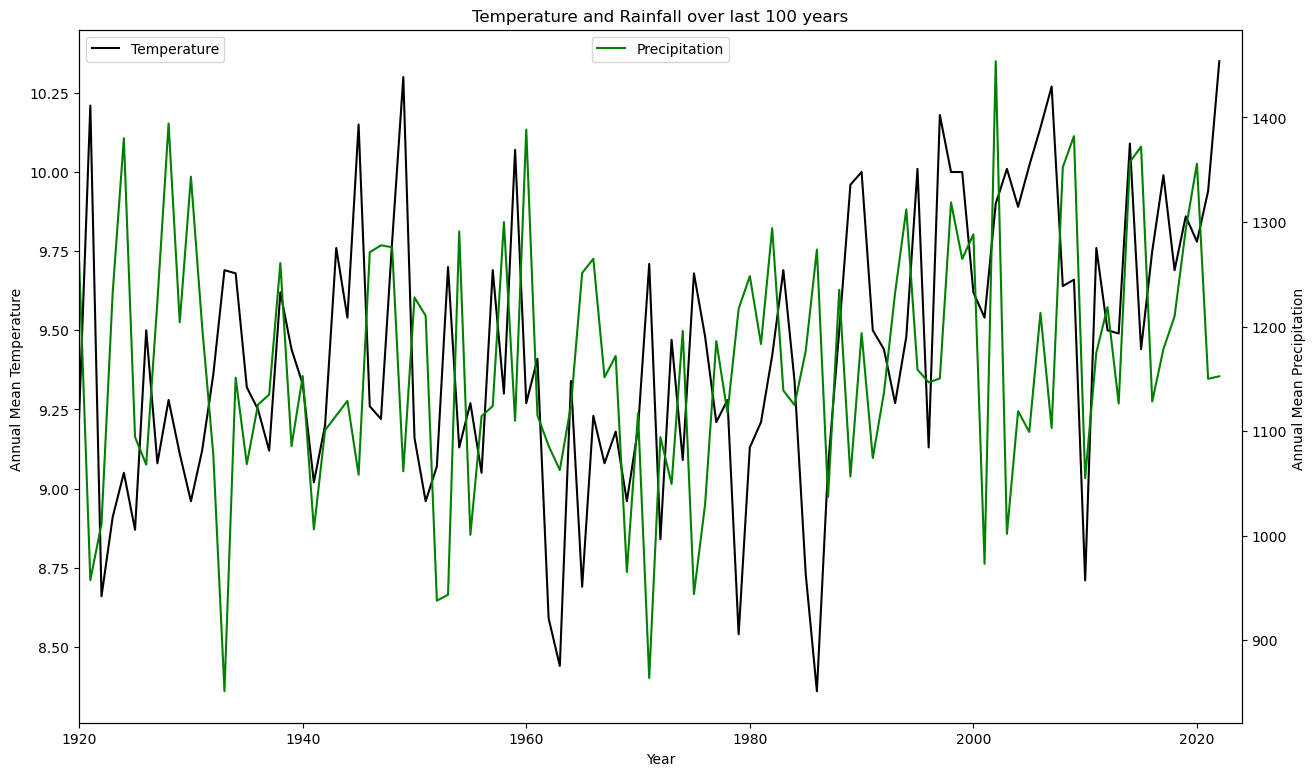

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,9))
ax2 = ax1.twinx()
sea.lineplot(x="Year", y="Annual Mean Temperature ", data=CompleteIrishTemperaturesfrom1900, color="black", ax=ax1, label="Temperature")
sea.lineplot(x="Year", y="Annual Mean Precipitation ", data=CompleteRainDatafrom1901, color="g", ax=ax2, label="Precipitation")
ax1.set_xlim(1920, 2024)
ax2.set_xlim(1920, 2024)
plt.title("Temperature and Rainfall over last 100 years")
plt.legend(loc='upper center')

In [ ]:
CompleteRainDatafrom1901.head()

,Year,Annual Mean Precipitation,Anomoly
0,1901,1071.26,-57.53
1,1902,1017.68,-111.11
2,1903,1370.80,242.01
3,1904,1085.16,-43.63
4,1905,960.97,-167.82


In [ ]:
CompleteRainDatafrom1901.tail()

,Year,Annual Mean Precipitation,Anomoly
117,2018,1209.96,81.17
118,2019,1293.03,164.24
119,2020,1355.80,227.01
120,2021,1150.11,21.32
121,2022,1152.55,23.76


In [ ]:
CompleteIrishTemperaturesfrom1900.head()

,Year,Annual Mean Temperature,Anomoly
0,1901,8.83,-0.60
1,1902,8.85,-0.58
2,1903,8.81,-0.62
3,1904,8.79,-0.64
4,1905,9.00,-0.43


In [ ]:
CompleteIrishTemperaturesfrom1900.tail()

,Year,Annual Mean Temperature,Anomoly
117,2018,9.69,0.26
118,2019,9.86,0.43
119,2020,9.78,0.35
120,2021,9.94,0.51
121,2022,10.35,0.92


While temperature and precipitation rates have dips and peaks, it is evident that they are overall on the rise, particularly over the past 30 years. The temperature levels are reaching unprecendentedly high levels, and are not having as low drops. 

The above head and tail functions show that the annual temperature mean has increased from 8.83 degrees celcius in 1901 to 10.35 in 2022, an increase of 1.52 degrees celcius.
Annual mean rainfall levels are also on the rise (please note that there were some uncharacteristically high rainfall levels at the start of the dataset which means I am unable to demonstrate the extent of the rainfall increase correctly.)


Text(0.5, 1.0, 'Regression Plot of Irish Rainfall & Precipitation')

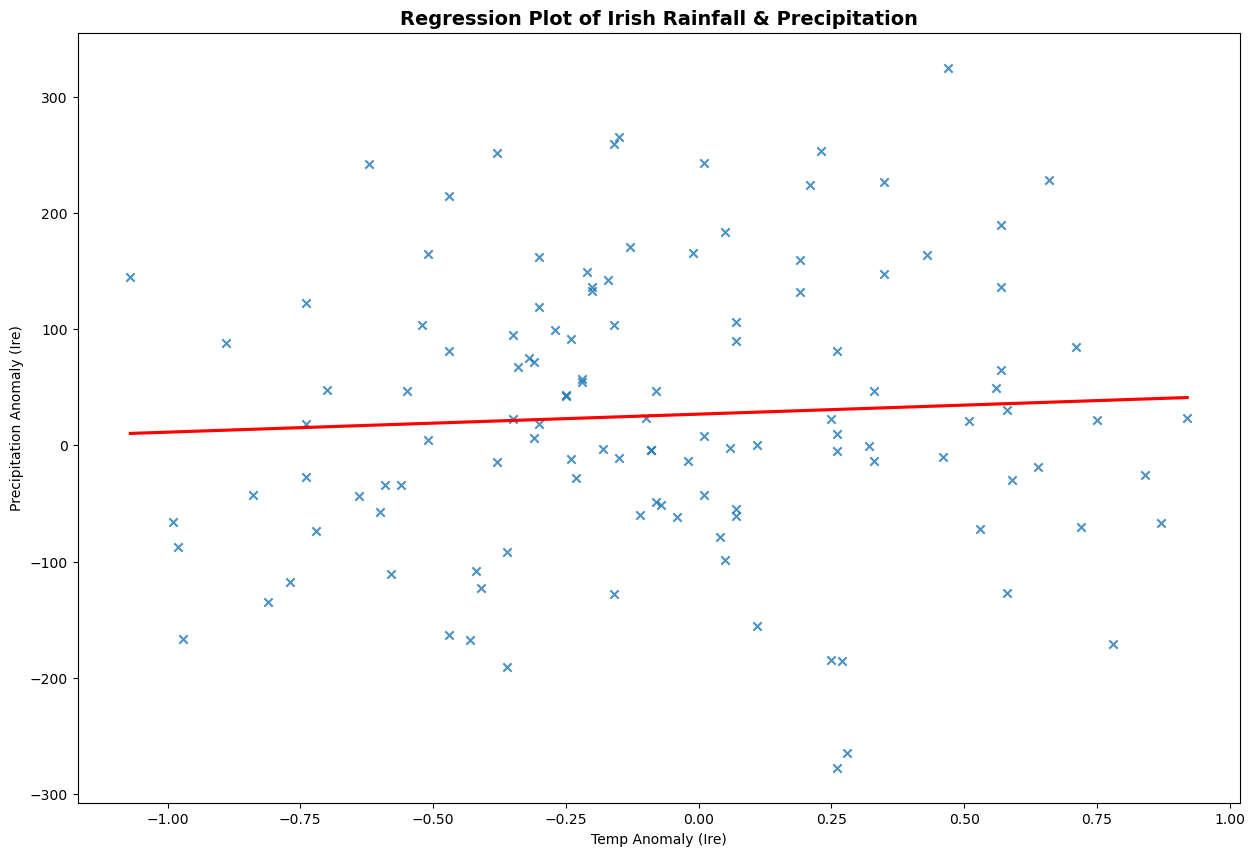

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

ax = sea.regplot(x='Temp Anomaly (Ire)', y='Precipitation Anomaly (Ire)', data=CompletingData, marker="x", ci=None, line_kws=dict(color="r"))
ax.set_title('Regression Plot of Irish Rainfall & Precipitation', weight = 'bold', size = 14)

In [ ]:
PlottingTempRainData  = pd.read_csv('FinalDataSet.csv')

print(PlottingTempRainData['Temp Anomaly (Ire)'].corr(PlottingTempRainData['Precipitation Anomaly (Ire)'])) #using correlation function

0.05931761160542365


From the above plots, it can be said that there is some semblance of correlation between the Temperature anomaly and precipitation anomaly. 
Anecdotal evidence, and even our own person recollections of Irish weather patterns, often state that the summers in Ireland are getting hotter, winters milder and there is increased precipitation throughout the year; though it should be noted that Ireland is somewhat of an outlier due to the impact of the gulf stream and location on the edge of the Atlantic Ocean.
The above data and plots appear to support these ideas that both temperature and precipitation rates are rising in line with the global trends of rising levels.
As the Earth gets hotter, leading to increased evaporation of water vapour. As heat rises, this water vapour also rises. When it reaches the cooler air up in the sky, this evaporated water cools and falls as increased precipitation.




## Combining all of the above datasets together

In [ ]:
JoinedData= pd.concat([CombinedData, CombinedMethane, CompleteIrishTemperaturesfrom1900, CompleteRainDatafrom1901], axis=1)
JoinedData.to_csv('CombinedDataSet.csv', index=False)


In [ ]:
CompletingData = pd.read_csv('CombinedDataSet.csv')

CompletingData.columns = ['Year', 'CO2 (ppmv)', 'Year(for Temp)','Temperature Anomaly', 
                           'Year (for CH4)', 'CH4 Mean', 'Year (for Ire records)',#
                               'Annual Mean Temperature (Ire)', 'Temp Anomaly (Ire)', 'Year (for Ire records)',
                                 'Annual Mean Precipitation (Ire)', 'Precipitation Anomaly (Ire)']  # replacing column names

CompletingData.to_csv('FinalDataSet.csv', index=False)


## Creating JSON file of Final Data Set (combined prior datasets)

In [ ]:
CompletingData = pd.read_csv('FinalDataSet.csv')
CompletingData.to_json('FinalDataSet.json', orient='records', lines=False, indent=4)

In [ ]:
CompletingData.describe()

,Year,CO2 (ppmv),Year(for Temp),Temperature Anomaly,Year (for CH4),CH4 Mean,Year (for Ire records),Annual Mean Temperature (Ire),Temp Anomaly (Ire),Year (for Ire records).1,Annual Mean Precipitation (Ire),Precipitation Anomaly (Ire)
count,1922.000000,1922.000000,1922.000000,1922.000000,2178.000000,2178.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,-238206.618878,237.311187,-4.359303,1532.921876,-259625.274105,554.285335,1961.500000,9.351967,-0.078033,1961.500000,1154.476311,25.686311
std,273924.642640,39.403235,3.104357,166.865157,244012.480944,208.297119,35.362409,0.459854,0.459854,35.362409,120.319797,120.319797
min,-803718.868405,173.713620,-9.660000,1148.338000,-797446.000000,342.000000,1901.000000,8.360000,-1.070000,1901.000000,851.380000,-277.410000
25%,-498160.281818,205.123067,-7.037500,1399.348750,-420163.000000,452.000000,1931.250000,9.055000,-0.375000,1931.250000,1075.255000,-53.535000
50%,-68289.713733,232.958978,-4.750000,1575.343000,-210526.500000,515.000000,1961.500000,9.310000,-0.120000,1961.500000,1146.955000,18.165000
75%,-12395.987750,259.475000,-2.050000,1675.443250,-35638.000000,597.000000,1991.750000,9.690000,0.260000,1991.750000,1232.647500,103.857500
max,2022.000000,418.530000,3.750000,1741.903000,2022.000000,1911.830000,2022.000000,10.350000,0.920000,2022.000000,1453.810000,325.020000


### Comparison to climate models and comments on accelerated warming

The above datasets and analysis support the notion that the earth is warming at an unprecedented rate, particularly in the last 50 years. As I have already established, the data which was obtained through examining the Antarctic ice cores show that temperatures, and CO2 levels have cyclically rose and fallen in a repeating pattern. This can be attributed largely to the glacial and interglacial periods of the ice ages over the last 800k years. 
However, the pace of the increases of the last approx. 100 years are unprecedented, and many scientists believe that the increased human activities of burning fossil fuels, fast fashion cycles and more has led to a steep rise in greenhouse gases such as methane.  

It has now been officially established that 2023 was the hottest year in all of human history. The average surface temperatures have increased by almost 0.2 degrees Celsius over the previous hottest recorded temperature (which was in 2016). In fact, temperatures are 1.48 degrees Celsius over preindustrial levels, per the EU’s Copernicus Climate Change Service.
While increased burning of fossil fuels and human activity has long been attributed as the cause of the rise in global temperatures and CO2, scientists are divided on the exact cause of the extreme increase in the pace of the increases, and if, and how this trend will continue. One such scientist is Michael Diamond, from Florida State University.
Some scientists argue that in light of the cyclical pattern which has occurred from 800k years ago to present, the current increase which is being examined in a very narrow time frame and we may simply be in the midst of this pattern reoccurring and normal short term fluctuations in levels.
However, though some scientists, including James Hansen, are predicting even further increases in global warming (up to 50% over the next century), others such as NASA scientist Mark Richardson have cautioned against making such drastic predictions considering the short timeframe in which the temperature increase is being examined in the grand scheme of the 800k records.    
Furthermore, fossil fuels alone cannot be considered the only factor leading to global warming. This is clear from the end of the La Nina climate pattern, which caused the suppression of global temperatures from 2020 to 2022. The end of La Nina lead to the El Nino climate pattern, which means unusually warm ocean temperatures along the Equatorial Pacific, which significantly increases global temperatures.   
Thus, it cannot be understated that this is an extremely complex issue, with no simply explanation nor solution. The above data and analysis clearly demonstrates that we are at a point in history where global temperatures and CO2 levels have never been as high.   
The above plots clearly show that this increase coincides with the Industrial Revolution of the 18th century, which heralded the beginning of a new era of human activity and fossil fuel burning. Thus, fossil fuels and human activity can be said to be an important factor when determining the cause of the increase and it is important that we focus on reducing the emissions and fossil fuel burnings to try and curb the increase.   
However, as I have stated above, this is only a very small period in the complete history of earth and so this the increase may be attributed mostly to the natural occuring pattern of historical peaks and dips.
I believe that the data supports the idea that it may simply be a combination of the above ideas. Global warming may be rising due to the recurring fluctuations throughout history, but they may be pushed to such extremes increases due to human activity exacerbating the increases.  
